In [ ]:
print("Student placement prediction")

Student placement prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("placement.csv")
df.head(200)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df.shape


(100, 4)

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:, 1:]


In [ ]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.duplicated().sum()


np.int64(0)

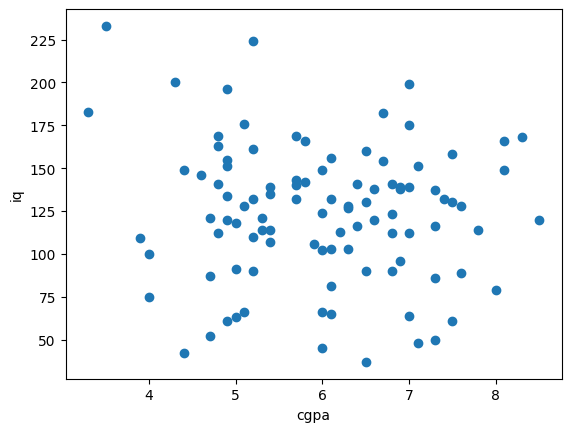

In [ ]:
plt.scatter(df['cgpa'], df['iq'])
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.show()


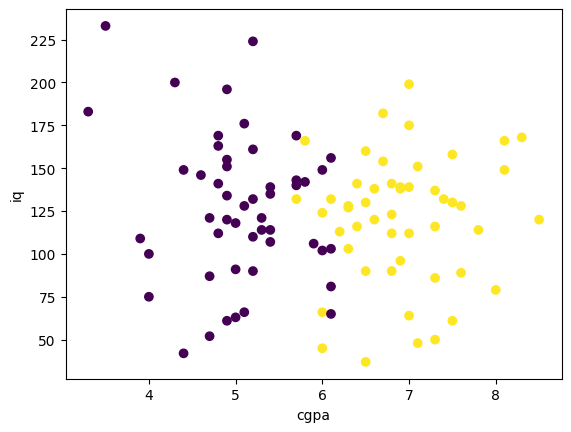

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.show()


In [ ]:
X = df.iloc[:, 0:2]


X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
y = df.iloc[:, -1]

y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)


In [ ]:
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

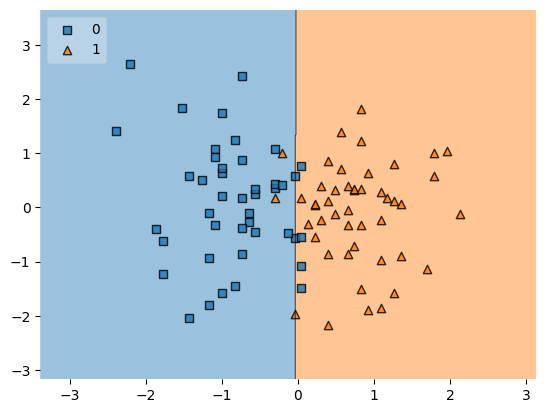

In [ ]:
plot_decision_regions(
    X_train,
    y_train.values,
    clf=model,
    legend=2
)


In [ ]:
import pickle


In [ ]:
pickle.dump(model, open('model.pkl','wb'))



In [ ]:
model = pickle.load(open('model.pkl','rb'))


In [ ]:
# Example input
iq = 120
cgpa = 8.5

input_data = scaler.transform([[cgpa, iq]])
result = model.predict(input_data)

if result == 1:
    print("Placement hoga")
else:
    print("Placement nahi hoga")


Placement hoga


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Example input
iq = 120
cgpa = 3.5

input_data = scaler.transform([[cgpa, iq]])
result = model.predict(input_data)

if result == 1:
    print("Placement hoga")
else:
    print("Placement nahi hoga")


Placement nahi hoga


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
